In [63]:
import torch

# Example data (inputs and targets)
X, Y = torch.randn((100, 10), requires_grad=False), torch.randn(100, requires_grad=False)

(1.1031348705291748, 1.1771663427352905)

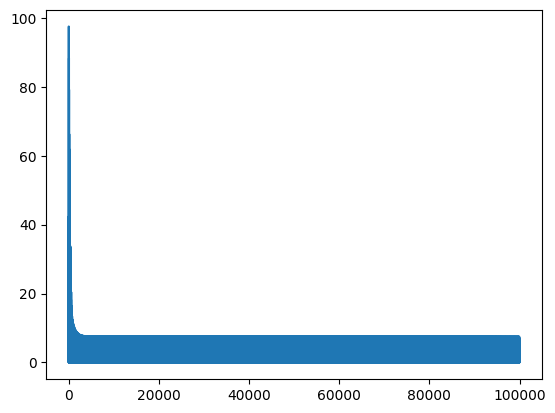

In [78]:
# Model parameters
W1 = torch.randn(2, 10, requires_grad=True)
W2 = torch.randn(2, requires_grad=True)
learning_rate = 0.0001
optimizer = torch.optim.SGD([W1, W2], lr=learning_rate)

loss_all = []


for _ in range(1000):
    for i in range(Y.shape[0]):
        y_pred1 = torch.matmul(W1, X[i])
        y_pred2 = torch.matmul(W2, y_pred1)

        loss = (y_pred2 - Y[i]).pow(2).sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        loss_all.append(loss.detach().cpu().item())

import matplotlib.pyplot as plt

plt.plot(loss_all)
loss_all[0], loss_all[-1]

(0.41202986240386963, 1.1577295064926147)

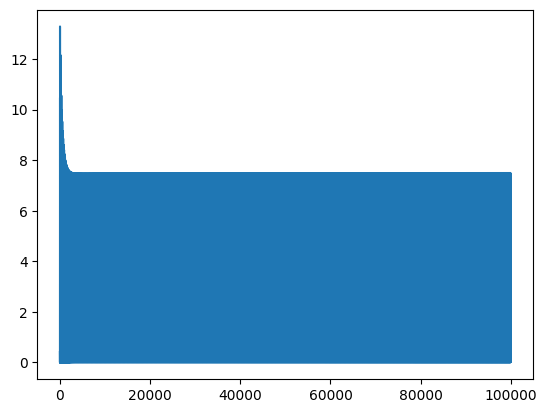

In [79]:
# Model parameters
W1 = torch.randn(2, 10, requires_grad=True)
W2 = torch.randn(2, requires_grad=True)
learning_rate = 0.0001
optimizer = torch.optim.SGD([W1, W2], lr=learning_rate)

loss_all = []

for _ in range(1000):
    y_pred1_all = []
    for i in range(Y.shape[0]):
        y_pred1 = torch.matmul(W1, X[i])
        y_pred1_all.append(y_pred1)

    for idx, y_pred1 in enumerate(y_pred1_all):
        y_pred2 = torch.matmul(W2, y_pred1)

        loss = (y_pred2 - Y[idx]).pow(2).sum()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        loss_all.append(loss.detach().cpu().item())

import matplotlib.pyplot as plt

plt.plot(loss_all)
loss_all[0], loss_all[-1]

In [3]:
import torch

# Example data (inputs and targets)
x1, y1 = torch.randn(10, requires_grad=False), torch.randn(1, requires_grad=False)
x2, y2 = torch.randn(10, requires_grad=False), torch.randn(1, requires_grad=False)

# Model parameters
W = torch.randn(1, 10, requires_grad=True)
learning_rate = 0.001
optimizer = torch.optim.SGD([W], lr=learning_rate)
# print(W)

for _ in range(100):
    y_pred1 = torch.matmul(W, x1)
    y_pred2 = torch.matmul(W, x2)

    loss = (y_pred1 - y1).pow(2).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(W)

    loss = (y_pred2 - y2).pow(2).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(W)
    print(loss)


tensor(1.8857, grad_fn=<SumBackward0>)
tensor(1.8001, grad_fn=<SumBackward0>)
tensor(1.7187, grad_fn=<SumBackward0>)
tensor(1.6413, grad_fn=<SumBackward0>)
tensor(1.5676, grad_fn=<SumBackward0>)
tensor(1.4974, grad_fn=<SumBackward0>)
tensor(1.4306, grad_fn=<SumBackward0>)
tensor(1.3670, grad_fn=<SumBackward0>)
tensor(1.3065, grad_fn=<SumBackward0>)
tensor(1.2488, grad_fn=<SumBackward0>)
tensor(1.1939, grad_fn=<SumBackward0>)
tensor(1.1415, grad_fn=<SumBackward0>)
tensor(1.0917, grad_fn=<SumBackward0>)
tensor(1.0442, grad_fn=<SumBackward0>)
tensor(0.9989, grad_fn=<SumBackward0>)
tensor(0.9557, grad_fn=<SumBackward0>)
tensor(0.9146, grad_fn=<SumBackward0>)
tensor(0.8753, grad_fn=<SumBackward0>)
tensor(0.8379, grad_fn=<SumBackward0>)
tensor(0.8022, grad_fn=<SumBackward0>)
tensor(0.7682, grad_fn=<SumBackward0>)
tensor(0.7357, grad_fn=<SumBackward0>)
tensor(0.7047, grad_fn=<SumBackward0>)
tensor(0.6751, grad_fn=<SumBackward0>)
tensor(0.6469, grad_fn=<SumBackward0>)
tensor(0.6199, grad_fn=<S

In [12]:
loss1, loss2

(tensor(4.1393, grad_fn=<SumBackward0>),
 tensor(2.0889, grad_fn=<SumBackward0>))

In [11]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool

# Step 2: Define the GNN Model


class GCN(torch.nn.Module):
    def __init__(self,num_node_features: int):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, 16)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)

        return x


# Step 1: Generate a Synthetic Graph
# Node features
x = torch.tensor([[1, 0], [0, 1], [1, 1], [1, 0]], dtype=torch.float)
# Edges
edge_index = torch.tensor([[0, 1, 2, 3, 0, 2],
                           [1, 0, 3, 2, 2, 0]], dtype=torch.long)
# Edge labels for classification
edge_label = torch.tensor([0, 1, 0, 1, 1, 0], dtype=torch.long)

data = Data(x=x, edge_index=edge_index)

model = GCN(num_node_features=data.num_node_features)

# Edge classifier: A simple linear layer
# Assuming we concatenate two node embeddings
edge_classifier = torch.nn.Linear(16 * 2, 2)

optimizer = torch.optim.Adam(
    list(model.parameters()) + list(edge_classifier.parameters()), lr=0.01)

# Step 3: Training Loop
for epoch in range(1000):
    node_embeddings = model(data)

    # node_embeddings.shape == torch.Size([4, 16])

    # Get embeddings of both source and target nodes of each edge
    source_embeddings = node_embeddings[data.edge_index[0]]
    target_embeddings = node_embeddings[data.edge_index[1]]

    # Edge classification: Here we concatenate source and target embeddings
    edge_embeddings = torch.cat([source_embeddings, target_embeddings], dim=1)
    edge_pred = edge_classifier(edge_embeddings)

    loss = F.cross_entropy(edge_pred, edge_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, pred = torch.max(edge_pred, dim=1)
    correct = pred.eq(edge_label).sum().item()
    accuracy = correct / edge_label.size(0)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy}')

Epoch 0, Loss: 0.6808598041534424, Accuracy: 0.5
Epoch 10, Loss: 0.5601635575294495, Accuracy: 0.8333333333333334
Epoch 20, Loss: 0.30671730637550354, Accuracy: 1.0
Epoch 30, Loss: 0.07796495407819748, Accuracy: 1.0
Epoch 40, Loss: 0.012967590242624283, Accuracy: 1.0
Epoch 50, Loss: 0.0034221073146909475, Accuracy: 1.0
Epoch 60, Loss: 0.0016223536804318428, Accuracy: 1.0
Epoch 70, Loss: 0.0010926665272563696, Accuracy: 1.0
Epoch 80, Loss: 0.0008700544130988419, Accuracy: 1.0
Epoch 90, Loss: 0.0007468627882190049, Accuracy: 1.0
Epoch 100, Loss: 0.0006629495765082538, Accuracy: 1.0
Epoch 110, Loss: 0.0005976849352009594, Accuracy: 1.0
Epoch 120, Loss: 0.0005431936588138342, Accuracy: 1.0
Epoch 130, Loss: 0.0004961230442859232, Accuracy: 1.0
Epoch 140, Loss: 0.0004548664146568626, Accuracy: 1.0
Epoch 150, Loss: 0.00041831305134110153, Accuracy: 1.0
Epoch 160, Loss: 0.000385788589483127, Accuracy: 1.0
Epoch 170, Loss: 0.0003567773092072457, Accuracy: 1.0
Epoch 180, Loss: 0.0003307832230348

torch.Size([4, 16])

In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Synthetic Graph Data Setup (including node features, edges, and edge labels)
x = torch.tensor([[1, 0], [0, 1], [1, 1], [1, 0]],
                 dtype=torch.float)  # Node features
edge_index = torch.tensor(
    [[0, 1, 2, 3, 0, 2], [1, 0, 3, 2, 2, 0]], dtype=torch.long
)  # Edges
edge_label = torch.tensor(
    [0, 1, 0, 1, 1, 0], dtype=torch.long
)  # Edge labels for classification

data = Data(x=x, edge_index=edge_index)


# EnhancedGCN Model Definition with Learnable Embeddings
class EnhancedGCN(torch.nn.Module):
    def __init__(self, num_nodes, num_node_features, num_embedding_features):
        super(EnhancedGCN, self).__init__()
        self.embeddings = torch.nn.Embedding(num_nodes, num_embedding_features)
        self.embeddings.weight.data.uniform_(0, 1)  # Initialize embeddings

        self.conv1 = GCNConv(num_embedding_features, 16)
        self.conv2 = GCNConv(16, 16)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        node_indices = torch.arange(
            0, x.size(0), dtype=torch.long, device=x.device)
        node_embeddings = self.embeddings(node_indices)

        # x = torch.cat([x, node_embeddings], dim=1)  # Concatenate original features with embeddings
        # x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv1(node_embeddings, edge_index))

        x = self.conv2(x, edge_index)

        return x


# Model and Optimizer Setup
num_nodes = data.num_nodes
num_node_features = data.num_features
num_embedding_features = 5  # Example additional embedding size
model = EnhancedGCN(num_nodes, num_node_features, num_embedding_features)

edge_classifier = torch.nn.Linear(
    16 * 2, 2
)  # Classifier for the concatenated node embeddings
optimizer = torch.optim.Adam(
    list(model.parameters()) + list(edge_classifier.parameters()), lr=0.01
)

# Training Loop with Accuracy Calculation for Edge Classification
for epoch in range(200):
    optimizer.zero_grad()
    node_embeddings = model(data)

    source_embeddings = node_embeddings[data.edge_index[0]]
    target_embeddings = node_embeddings[data.edge_index[1]]
    edge_embeddings = torch.cat([source_embeddings, target_embeddings], dim=1)

    edge_pred = edge_classifier(edge_embeddings)
    loss = F.cross_entropy(edge_pred, edge_label)
    loss.backward()
    optimizer.step()

    # Calculate and print accuracy
    _, pred = torch.max(edge_pred, dim=1)
    correct = pred.eq(edge_label).sum().item()
    accuracy = correct / edge_label.size(0)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy}")

Epoch 0, Loss: 0.7016306519508362, Accuracy: 0.5
Epoch 10, Loss: 0.6459193825721741, Accuracy: 0.8333333333333334
Epoch 20, Loss: 0.42045748233795166, Accuracy: 0.6666666666666666
Epoch 30, Loss: 0.08629082888364792, Accuracy: 1.0
Epoch 40, Loss: 0.0052810912020504475, Accuracy: 1.0
Epoch 50, Loss: 0.00060127186588943, Accuracy: 1.0
Epoch 60, Loss: 0.00018166076915804297, Accuracy: 1.0
Epoch 70, Loss: 0.00010940333595499396, Accuracy: 1.0
Epoch 80, Loss: 8.832736784825101e-05, Accuracy: 1.0
Epoch 90, Loss: 7.98052569734864e-05, Accuracy: 1.0
Epoch 100, Loss: 7.515673496527597e-05, Accuracy: 1.0
Epoch 110, Loss: 7.18192895874381e-05, Accuracy: 1.0
Epoch 120, Loss: 6.905792542966083e-05, Accuracy: 1.0
Epoch 130, Loss: 6.649520219070837e-05, Accuracy: 1.0
Epoch 140, Loss: 6.40715443296358e-05, Accuracy: 1.0
Epoch 150, Loss: 6.174719601403922e-05, Accuracy: 1.0
Epoch 160, Loss: 5.948244870523922e-05, Accuracy: 1.0
Epoch 170, Loss: 5.731702549383044e-05, Accuracy: 1.0
Epoch 180, Loss: 5.531

In [19]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data


class EnhancedGCNWithEdgeClassification(torch.nn.Module):
    def __init__(self, num_nodes, num_node_features, num_embedding_features, out_channels):
        super(EnhancedGCNWithEdgeClassification, self).__init__()
        self.embeddings = torch.nn.Embedding(num_nodes, num_embedding_features)
        self.embeddings.weight.data.uniform_(0, 1)  # Initialize embeddings

        self.conv1 = GCNConv(num_node_features + num_embedding_features, 16)
        self.conv2 = GCNConv(16, out_channels)

        # Instead of a separate edge classifier, incorporate it into the GNN model
        # Assuming binary classification for edges
        self.edge_classifier = torch.nn.Linear(out_channels * 2, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        node_indices = torch.arange(
            0, x.size(0), dtype=torch.long, device=x.device)
        node_embeddings = self.embeddings(node_indices)
        # Concatenate original features with embeddings
        x = torch.cat([x, node_embeddings], dim=1)

        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)

        # Now, for each edge, use the node embeddings to predict edge labels
        source_embeddings = x[edge_index[0]]
        target_embeddings = x[edge_index[1]]
        edge_embeddings = torch.cat(
            [source_embeddings, target_embeddings], dim=1)
        edge_pred = self.edge_classifier(edge_embeddings)

        return edge_pred


# Parameters and Data Initialization
num_nodes = data.num_nodes
num_node_features = data.num_features
num_embedding_features = 5  # Example additional embedding size
out_channels = 16  # Example size for the node embeddings used in edge predictions

model = EnhancedGCNWithEdgeClassification(
    num_nodes, num_node_features, num_embedding_features, out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Assume edge_index, x, and edge_label are defined as in the previous examples

data = Data(x=x, edge_index=edge_index)

# Training Loop with the Adjusted Model
for epoch in range(200):
    optimizer.zero_grad()
    edge_pred = model(data)  # The model now directly outputs edge predictions
    loss = F.cross_entropy(edge_pred, edge_label)
    loss.backward()
    optimizer.step()

    # Calculate and print accuracy
    _, pred = torch.max(edge_pred, dim=1)
    correct = pred.eq(edge_label).sum().item()
    accuracy = correct / edge_label.size(0)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy}')

Epoch 0, Loss: 0.7564857602119446, Accuracy: 0.5
Epoch 10, Loss: 0.6708261370658875, Accuracy: 0.5
Epoch 20, Loss: 0.5375721454620361, Accuracy: 1.0
Epoch 30, Loss: 0.2010474056005478, Accuracy: 1.0
Epoch 40, Loss: 0.02258077822625637, Accuracy: 1.0
Epoch 50, Loss: 0.0017681272001937032, Accuracy: 1.0
Epoch 60, Loss: 0.0004274191742297262, Accuracy: 1.0
Epoch 70, Loss: 0.00013457309978548437, Accuracy: 1.0
Epoch 80, Loss: 4.569508018903434e-05, Accuracy: 1.0
Epoch 90, Loss: 1.9251956473453902e-05, Accuracy: 1.0
Epoch 100, Loss: 1.0351240234740544e-05, Accuracy: 1.0
Epoch 110, Loss: 6.7551518441177905e-06, Accuracy: 1.0
Epoch 120, Loss: 5.026635790272849e-06, Accuracy: 1.0
Epoch 130, Loss: 3.993497557530645e-06, Accuracy: 1.0
Epoch 140, Loss: 3.3179824185936013e-06, Accuracy: 1.0
Epoch 150, Loss: 2.841147761500906e-06, Accuracy: 1.0
Epoch 160, Loss: 2.463653572704061e-06, Accuracy: 1.0
Epoch 170, Loss: 2.1656312583218096e-06, Accuracy: 1.0
Epoch 180, Loss: 1.9272138160886243e-06, Accura

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
# from gymnasium import make
import gymnasium as gym

# Define the Actor-Critic network


class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(ActorCritic, self).__init__()
        self.actor = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, action_dim),
            nn.Softmax(dim=-1),
        )
        self.critic = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, state):
        action_probs = self.actor(state)
        state_value = self.critic(state)
        return action_probs, state_value

# Compute Generalized Advantage Estimation (GAE)


def compute_gae(next_value, rewards, masks, values, gamma=0.99, tau=0.95):
    values = values + [next_value]
    gae = 0
    returns = []
    for step in reversed(range(len(rewards))):
        delta = rewards[step] + gamma * \
            values[step + 1] * masks[step] - values[step]
        gae = delta + gamma * tau * masks[step] * gae
        returns.insert(0, gae + values[step])
    return returns

# Train the PPO agent


def train(env_name, epochs=1000, steps_per_epoch=2048, gamma=0.99, tau=0.95, clip_param=0.2, policy_lr=3e-4, value_lr=1e-3):
    # env = make(env_name)
    env = gym.make("CartPole-v1")
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    network = ActorCritic(state_dim, action_dim)
    optimizer = optim.Adam(network.parameters(), lr=policy_lr)
    value_optimizer = optim.Adam(network.critic.parameters(), lr=value_lr)

    for epoch in range(epochs):
        state, info = env.reset()
        log_probs = []
        values = []
        rewards = []
        masks = []
        actions = []
        states = []
        for _ in range(steps_per_epoch):
            state = torch.FloatTensor(state).unsqueeze(0)

            action_probs, value = network(state)
            dist = Categorical(action_probs)
            action = dist.sample()

            next_state, reward, done, truncated, info = env.step(action.item())
            log_prob = dist.log_prob(action)
            log_probs.append(log_prob)
            values.append(value)
            rewards.append(reward)
            masks.append(1-done)
            actions.append(action)
            states.append(state)
            state = next_state

            if done:
                state, info = env.reset()

        next_state = torch.FloatTensor(next_state).unsqueeze(0)
        _, next_value = network(next_state)
        returns = compute_gae(next_value, rewards, masks, values, gamma, tau)

        # Convert lists to tensors
        log_probs = torch.cat(log_probs)
        returns = torch.cat(returns).detach()
        values = torch.cat(values).detach()
        states = torch.cat(states)
        actions = torch.cat(actions)
        advantage = returns - values

        # Update policy and value networks
        _, new_values = network(states)
        dist = Categorical(network.actor(states))
        new_log_probs = dist.log_prob(actions)

        ratio = (new_log_probs - log_probs).exp()
        surr1 = ratio * advantage
        surr2 = torch.clamp(ratio, 1.0 - clip_param,
                            1.0 + clip_param) * advantage

        policy_loss = -torch.min(surr1, surr2).mean()
        value_loss = (returns - new_values).pow(2).mean()

        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        value_optimizer.zero_grad()
        value_loss.backward()
        value_optimizer.step()

        print(f'Epoch {epoch}, Loss: {policy_loss.item()}')


if __name__ == '__main__':
    train('CartPole-v1')

Epoch 0, Loss: -7.742973327636719
Epoch 1, Loss: -7.680062294006348
Epoch 2, Loss: -7.813106536865234
Epoch 3, Loss: -7.8224077224731445
Epoch 4, Loss: -7.743018627166748
Epoch 5, Loss: -8.202510833740234
Epoch 6, Loss: -7.553354740142822
Epoch 7, Loss: -8.010868072509766
Epoch 8, Loss: -7.105863571166992
Epoch 9, Loss: -8.162364959716797
Epoch 10, Loss: -7.905317783355713
Epoch 11, Loss: -7.111297130584717
Epoch 12, Loss: -7.412032127380371
Epoch 13, Loss: -7.288893222808838
Epoch 14, Loss: -7.157147407531738
Epoch 15, Loss: -7.519998073577881
Epoch 16, Loss: -7.834115505218506
Epoch 17, Loss: -8.216315269470215
Epoch 18, Loss: -7.244935512542725
Epoch 19, Loss: -7.591847896575928
Epoch 20, Loss: -7.370690822601318
Epoch 21, Loss: -7.748913288116455
Epoch 22, Loss: -7.396695137023926
Epoch 23, Loss: -8.078722953796387
Epoch 24, Loss: -7.408994674682617
Epoch 25, Loss: -7.649755477905273
Epoch 26, Loss: -7.609882831573486
Epoch 27, Loss: -7.472285270690918
Epoch 28, Loss: -7.7697334289

KeyboardInterrupt: 